# Visualización y entrenamiento de un modelo de Regresión lineal con Scikit-learn

## Importando dependencias

In [ ]:
import pandas as pd # Manejo de datos
import seaborn as sns # Creación de gráficas y visualización de datos
import matplotlib.pyplot as plt # Dependencia para crear gráficos

## Explorando nuestro set de datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AX4XfWhpzvZldhr_Sq85VkG-wNlWlIr_OcEFi7FerELz9XnwaH-wb6JUnv0
Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datacademy/studentsperformance_15085fee-8bc7-4d33-a182-655428728fe1.csv')

In [ ]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [ ]:
df.shape

(1000, 8)

In [ ]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [ ]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

### Creando un histograma

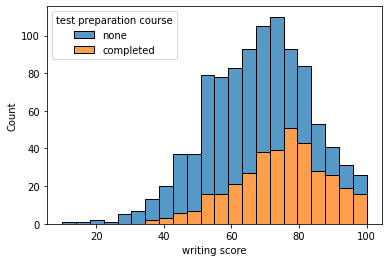

In [ ]:
sns.histplot(data=df, x = 'writing score', hue = 'test preparation course', multiple = 'stack' )

### Visualizando nuestros datos

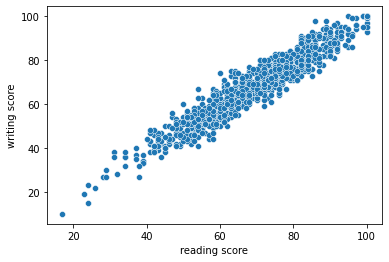

In [ ]:
sns.scatterplot(data=df, x='reading score', y='writing score' )

### Creando una tabla de frecuencias

In [ ]:
freq = df['writing score'].value_counts()
df_freq = freq.to_frame()
df_freq.reset_index(inplace=True)
df_freq = df_freq.rename(columns={'index': 'writing score', 'writing score': 'number of students'})
df_freq

,writing score,number of students
0,74,35
1,70,33
2,68,31
3,73,28
4,62,27
...,...,...
72,23,1
73,22,1
74,19,1
75,15,1


### Promedio de los puntajes

In [ ]:
df.mean()

math score       66.089
reading score    69.169
writing score    68.054
dtype: float64

### Mediana de los puntajes

In [ ]:
df.median()

math score       66.0
reading score    70.0
writing score    69.0
dtype: float64

## Entrenando nuestro modelo

***x*** será el puntaje de lectura
y ***y*** sera el puntaje de escritura

Suponemos que si obtienen un buen puntaje en el test de lectura deben obtener un mayor puntaje en el test escritura

In [ ]:
X = df['reading score'].values
Y = df['writing score'].values

# Le damos forma "fit" a los datos para que puedan ser usados en el método fit
X = X.reshape(-1,1)

# Divivimos los datos en 80% para entrenamiento y 20% para prueba
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
# Regresión lineal
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

reg.fit(X_train, Y_train)

print('La pendiente es: ', reg.coef_)
print('El bias es: ', reg.intercept_)
print('El coeficiente de determinación es:', reg.score(X_train, Y_train))

La pendiente es:  [0.99445206]
El bias es:  -0.800384160243496
El coeficiente de determinación es: 0.9104691932498858


## Visualización de nuestro modelo entrenado

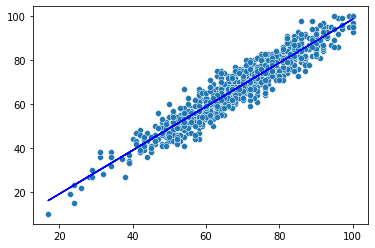

In [ ]:
x_flat = X_train.flatten()

y_hat = reg.predict(X_train)

fig, ax = plt.subplots()
sns.scatterplot(x=x_flat, y=Y_train)
plt.plot(X_train, y_hat, color='b')

#Saludos al profe de portafolio - Miguel Miranda

## Evaluación de nuestro modelo

In [ ]:
from sklearn.metrics import mean_squared_error

y_pred = reg.predict(X_test)

# Calculamos el mean squared error
print(mean_squared_error(Y_test, y_pred))

18.352117548167246


In [ ]:
value = pd.DataFrame({'Actual test': Y_test.flatten(), 'Predict': y_pred.flatten()})
value

,Actual test,Predict
0,48,39.972150
1,77,81.739137
2,67,66.822356
3,58,58.866740
4,76,77.761329
...,...,...
195,47,41.961055
196,80,80.744685
197,57,56.877836
198,82,84.722493
